In [4]:
import tensorflow as tf 
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from keras.preprocessing import image
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

In [5]:
import tensorflow as tf 
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from keras.preprocessing import image
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

In [6]:
batch_size=16 
epoch_count=50 
noise_dm=100 
n_class=10 
tags=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
img_size=32 
(X_train,y_train),(_,_)=cifar10.load_data()
X_train=(X_train-127.5)/127.5
dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train))
dataset=dataset.shuffle(buffer_size=1000).batch(batch_size)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 74s 0us/step


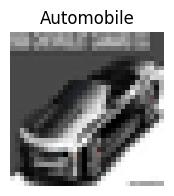

In [8]:
plt.figure(figsize=(2,2))
idx=np.random.randint(0,len(X_train))
img=image.array_to_img(X_train[idx],scale=True)
plt.imshow(img)
plt.axis('off')
plt.title(tags[y_train[idx][0]])
plt.show()

In [9]:
bce_loss=tf.keras.losses.BinaryCrossentropy()
def discriminator_loss(real,fake):
    real_loss=bce_loss(tf.ones_like(real),real)
    fake_loss=bce_loss(tf.ones_like(fake),fake)
    total_loss=real_loss+fake_loss
    return total_loss
def generator_loss(preds):
    return bce_loss(tf.ones_like(preds),preds)
d_optimizer=Adam(learning_rate=0.0002,beta_1=0.5)
g_optimizer=Adam(learning_rate=0.0002,beta_2=0.5)

In [12]:
## work of leaky relu if you know please ignore 
input_tensor=tf.constant([[-1,-2],[3,4]])
output_tensor=tf.nn.leaky_relu(input_tensor,alpha=0.1)
print(output_tensor)
## this is not part of cGAN 

tf.Tensor(
[[-0.1 -0.2]
 [ 3.   4. ]], shape=(2, 2), dtype=float32)


In [ ]:
def build_generator():
    in_label=tf.keras.layers.Input(shape=(1,))
    li=tf.keras.layers.Embedding(n_class,50)(in_label)
    n_nodes=8*8 
    li=tf.keras.layers.Dense(n_nodes)(li)
    li=tf.keras.layers.Reshape((8,8,1))(li)
    in_lat=tf.keras.layers.Input(shape=(noise_dm))

    n_nodes=128*8*8 
    gen=tf.keras.layers.Dense(n_nodes)(in_lat)
    gen=tf.keras.layers.LeakyReLU(alpha=0.2)(gen)
    gen=tf.keras.layers.Reshape((8,8,128))(gen)
    merge=tf.keras.layers.Concatenate()([gen,li])



    gen=tf.keras.Conv2DTranspose(128,(4,4),strides=(2,2),padding="same")(merge)
    gen=tf.keras.layers.LeakyReLU(alpha=0.2)(gen)
    gen=tf.keras.Conv2DTranspose(128,(4,4),strides=(2,2),padding="same")(gen)
    gen=tf.keras.layers.LeakyReLU(alpha=0.2)(gen)
    out_layer=tf.keras.layers.Conv2D(3,(8,8),activation='tanh',padding='same')(gen)

    model=Model([in_lat,in_label],out_layer)
    return model 
g_model=build_generator()
g_model.summary()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1831339273.py, line 21)